In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [176]:
df_train = pd.read_csv("datos/train.csv")
df_train.keyword = df_train["keyword"].fillna("N/A")
df_train.location = df_train["location"].fillna("N/A")
df_train.text = df_train["text"].fillna("N/A")

In [177]:
print("Valores nulos sobre la columna Keyword sobre total ", str(len(df_train[df_train.keyword == "N/A"])), " / ", str(len(df_train)))
print("Valores nulos sobre la columna Location sobre total ", str(len(df_train[df_train.location == "N/A"])), " / ", str(len(df_train)))
print("Valores nulos sobre la columna Text sobre total ", str(len(df_train[df_train.text == "N/A"])), " / ", str(len(df_train)))

Valores nulos sobre la columna Keyword sobre total  61  /  7613
Valores nulos sobre la columna Location sobre total  2533  /  7613
Valores nulos sobre la columna Text sobre total  0  /  7613


In [178]:
## Localizados VS Sin Localizar

In [179]:
total_registros = len(df_train)
localizados = df_train[(df_train['location'] != 'N/A')] 
n_localizados = len(localizados['location'])

sin_localizar = df_train[(df_train['location'] == 'N/A')]
n_sin_localizar = len(sin_localizar['location'])

print("Cantidad de registros localizados: ",n_localizados)
print("Cantidad de registros sin localizar: ",n_sin_localizar)
print("Todal de registros : ",total_registros)

Cantidad de registros localizados:  5080
Cantidad de registros sin localizar:  2533
Todal de registros :  7613


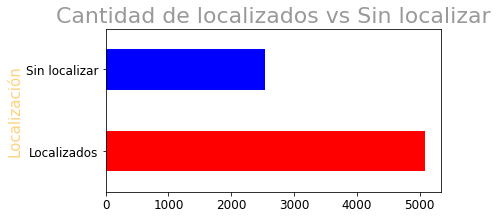

In [180]:
#Devuelvo item dependiendo si esta localizado o no

def esta_en_av(string):
    if string=='N/A':
        return 'Sin localizar'
    else :
        return 'Localizados'

#mapeo el set en una columna con los resultados de acuerdo a la funcion anterior
data = df_train['location'].map(esta_en_av)

#defino los colores que quiero especificamente
colors = ['red' if (x == max(data.value_counts())) else 'blue' for x in data.value_counts()]

#Grafico una función de barras para comparar resultados
g = data.value_counts().plot(kind='barh', y='cantidad', figsize=(6,3), fontsize=12, legend=False, alpha = 1, color = colors)
g.set_title("Cantidad de localizados vs Sin localizar", fontsize=22, color = 'black',alpha = 0.4)
g.set_ylabel("Localización", fontsize=15, color = 'orange', alpha = 0.5)
plt.show()


In [181]:
## Registros que mencionan paises 

In [182]:
#Arrays copiados de la web
list_norteamerica = ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States of America']

list_sudamerica = ['Argentina', 'Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela']

list_africa = ['Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cabo Verde','Cameroon','Central African Republic','Chad','Comoros','Democratic Republic of the Congo','Republic of the Congo','Cote d\'Ivoire','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe']

list_europa = ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','Georgia','Germany','Greece','Iceland','Ireland','Italy','Kazakhstan','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Norway','Poland','Portugal','Romania','Russia','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Turkey','Ukraine','United Kingdom','Vatican City']

list_asia = ['Armenia','Azerbaijan','Bahrain','Bangladesh','Bhutan','Brunei', 'Cambodia','China','Cyprus','Georgia','India','Indonesia','Iran','Iraq','Israel', 'Japan','Jordan','Kazakhstan','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Myanmar','Nepal','North Korea','Oman','Pakistan','Palestine','Philippines','Qatar','Russia','Saudi Arabia','Singapore','South Korea','Sri Lanka','Syria','Taiwan','Tajikistan','Thailand','Timor Leste','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen']

def esta_en_lista(a,lista):
    for w in lista:
        if w == a:
            return True
           
    

def esta_en_map(string):
    listaPalabras = string.split()
    frecuenciaPalab = []
    for w in listaPalabras:
       if esta_en_lista(w,list_norteamerica):
            return 'Norteamerica'
       if esta_en_lista(w,list_sudamerica):
            return 'Sudamerica'
       if esta_en_lista(w,list_africa):
            return 'Africa'
       if esta_en_lista(w,list_europa):
            return 'Europa'
       if esta_en_lista(w,list_asia):
            return 'Asia'
    return 'N/A'

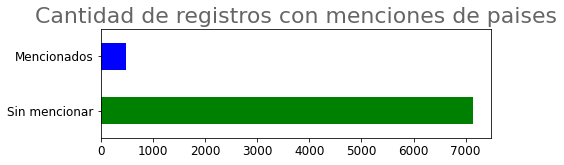

In [183]:
#mapeo el set en una columna con los resultados de acuerdo a la funcion anterior
df_train['Continente'] = df_train['location'].map(esta_en_map)

#mapeo segun sea mencionado un país o no en su locación
data = df_train['Continente'].map(lambda x: 'Mencionados' if x != 'N/A' else 'Sin mencionar')

#defino los colores
colors = ['green','blue']

#Grafico
g = data.value_counts().plot(kind='barh', y='cantidad', figsize=(7,2), fontsize=12, legend=False,color = colors)
g.set_title("Cantidad de registros con menciones de paises", fontsize=22, color = 'black',alpha = 0.6)
plt.show()


In [184]:
## Paises Mencionados

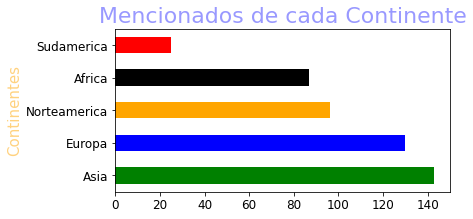

In [185]:

data = df_train[(df_train['Continente'] != 'N/A')]

#defino los colores
colors = ['green','blue','orange','black','red']

#Grafico
g = data['Continente'].value_counts().plot(kind='barh', y='cantidad', figsize=(6,3), fontsize=12, legend=False, alpha = 1, color = colors)
g.set_title("Mencionados de cada Continente", fontsize=22, color = 'blue',alpha = 0.4)
g.set_ylabel("Continentes", fontsize=15, color = 'orange', alpha = 0.5)
plt.show()

In [186]:
##De acuerdo a los índices de cada continente:
#Considerando que algunos continentes tienen más paises que otros se indicaran los datos de acuerdo a estos.
len(list_sudamerica)


12